# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** FUAD HAMDI BAHAR
- **Email:** fuadhamdi99@gmail.com
- **ID Dicoding:** GRX54VDRYP0M

## Menentukan Pertanyaan Bisnis

- 5 Product Category Name dengan rata-rata review score tertinggi dan terendah
- Jumlah transaksi dari 3 seller dengan transaksi terbesar setiap bulannya di tahun 2018

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
customer = pd.read_csv('data/customers_dataset.csv')
location = pd.read_csv('data/geolocation_dataset.csv')
order_item = pd.read_csv('data/order_items_dataset.csv')
order_payment = pd.read_csv('data/order_payments_dataset.csv')
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
order = pd.read_csv('data/orders_dataset.csv')
product_category = pd.read_csv('data/product_category_name_translation.csv')
products = pd.read_csv('data/products_dataset.csv')
sellers = pd.read_csv('data/sellers_dataset.csv')

In [3]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
order.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [9]:
order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- Tabel customer mengandung id, kota dan kode negara
- Tabel location menunjukan negara dan kota yang dilengkapi titik koordinat berupa lat dan lng, terdapat 1000163 entries
- Rata-rata review score dari 99224 review adalah 4.08

Menggabungkan tabel-tabel yang diperlukan

In [10]:
# CUSTOMER - ORDER - ORDER_ITEM - PRODUCTS - REVIEWS
all = pd.merge(customer, order, on='customer_id', how='inner')
all = pd.merge(all, order_item, on='order_id', how='inner')
all = pd.merge(all, products, on='product_id')

# menggunakan left untuk mengambil reviews yang ada customernya saja
all = pd.merge(all, order_reviews, on='order_id', how='left')

In [11]:
all.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8683.0,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,10150.0,89.0,15.0,40.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,8267.0,52.0,52.0,17.0,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,12160.0,56.0,51.0,28.0,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,5200.0,45.0,15.0,35.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


In [12]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113314 non-null  object 
 1   customer_unique_id             113314 non-null  object 
 2   customer_zip_code_prefix       113314 non-null  int64  
 3   customer_city                  113314 non-null  object 
 4   customer_state                 113314 non-null  object 
 5   order_id                       113314 non-null  object 
 6   order_status                   113314 non-null  object 
 7   order_purchase_timestamp       113314 non-null  object 
 8   order_approved_at              113299 non-null  object 
 9   order_delivered_carrier_date   112111 non-null  object 
 10  order_delivered_customer_date  110839 non-null  object 
 11  order_estimated_delivery_date  113314 non-null  object 
 12  order_item_id                 

### Assessing Data

In [13]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [14]:
order_reviews.duplicated(subset=['review_id', 'order_id']).sum()

np.int64(0)

In [15]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [16]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [17]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [18]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**
- Pada tabel Order Reviews, kolom review_comment_title dan review_comment_message mengandung missing value sebanyak berturut-turut 87656 dan 58247
    namun tidak ditemukan nilai duplikat. review_creation_date dan review_answer timestamp menggunakan format tanggal diikuti waktu yang konsisten
- Pada tabel Order, terdapat 3 kolom yang ditemukan mengandung missing value yaitu order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date
- Pada tabel Products, hanya kolom product_id yang tidak mengandung missing value. Seluruh kolom selain product_id dan product_category_name menggunakan angka sebagai valuenya

### Cleaning Data

Untuk menyederhanakan data, perlu untuk membuang beberapa kolom yang tidak digunakan

In [19]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113314 non-null  object 
 1   customer_unique_id             113314 non-null  object 
 2   customer_zip_code_prefix       113314 non-null  int64  
 3   customer_city                  113314 non-null  object 
 4   customer_state                 113314 non-null  object 
 5   order_id                       113314 non-null  object 
 6   order_status                   113314 non-null  object 
 7   order_purchase_timestamp       113314 non-null  object 
 8   order_approved_at              113299 non-null  object 
 9   order_delivered_carrier_date   112111 non-null  object 
 10  order_delivered_customer_date  110839 non-null  object 
 11  order_estimated_delivery_date  113314 non-null  object 
 12  order_item_id                 

In [20]:
selected_column_data = all[['customer_id', 'order_id', 'product_id', 'review_id', 'seller_id', 'review_score', 'product_category_name', 'order_status', 'order_purchase_timestamp']]

In [21]:
selected_column_data.customer_id.unique().__len__()

98666

**Insight:**
- Kita mampu mengurangi kompleksitas data dengan menghapus data yang kosong
-

## Exploratory Data Analysis (EDA)

### Explore ...

## Pertama

- Menghapus row yang tidak mengandung review_Score, karena kita akan mengurutkan product category name berdasarkan review_score
- Menghapus duplicate row

In [22]:
cleaned_data = selected_column_data.dropna(axis=0, subset=['review_score']).drop_duplicates().reset_index(drop=True)

In [23]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102230 entries, 0 to 102229
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               102230 non-null  object 
 1   order_id                  102230 non-null  object 
 2   product_id                102230 non-null  object 
 3   review_id                 102230 non-null  object 
 4   seller_id                 102230 non-null  object 
 5   review_score              102230 non-null  float64
 6   product_category_name     100773 non-null  object 
 7   order_status              102230 non-null  object 
 8   order_purchase_timestamp  102230 non-null  object 
dtypes: float64(1), object(8)
memory usage: 7.0+ MB


In [24]:
product_category_score = cleaned_data.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)
product_category_score

product_category_name
cds_dvds_musicais                                4.666667
fashion_roupa_infanto_juvenil                    4.500000
livros_interesse_geral                           4.446768
construcao_ferramentas_ferramentas               4.425532
alimentos_bebidas                                4.395745
                                                   ...   
fashion_roupa_masculina                          3.639344
moveis_escritorio                                3.595532
portateis_cozinha_e_preparadores_de_alimentos    3.428571
pc_gamer                                         3.125000
seguros_e_servicos                               2.500000
Name: review_score, Length: 73, dtype: float64

## Kedua

Jumlah transaksi dari 5 seller dengan transaksi terbesar dalam periode waktu tertentu

Menggabungkan all data dengan informasi seller

In [25]:
selected_column_data = pd.merge(selected_column_data, sellers, on='seller_id', how='inner')

Diasumsikan data dengan order_status canceled atau unavailable ada order yang gagal
Sehingga perlu menghapus data tersebut

In [26]:
selected_column_data.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'canceled',
       'unavailable', 'approved'], dtype=object)

In [27]:
finished_transaction = selected_column_data[(selected_column_data.order_status != 'canceled') & (selected_column_data.order_status != 'unavailable')]
# finished_transaction.info()

In [28]:
finished_transaction = finished_transaction[
    (finished_transaction.order_purchase_timestamp > '2018-01-01 00:00:00') &
        (finished_transaction.order_purchase_timestamp < '2018-12-31 23:59:59')
    ]

Mencari id seller dengan penjualan terbanyak

In [29]:
top_finished = finished_transaction.seller_id.value_counts()[:3].index.tolist()

In [30]:
top_finished

['955fee9216a65b617aa5c0531780ce60',
 '6560211a19b47992c3666cc44a7e94c0',
 '1025f0e2d44d7041d6cf58b6550e0bfa']

In [31]:
type(top_finished)

list

Mengambil data transaksi dari 3 seller id

In [32]:
finished_transaction = finished_transaction[
    (finished_transaction.seller_id == '955fee9216a65b617aa5c0531780ce60') |
        (finished_transaction.seller_id == '6560211a19b47992c3666cc44a7e94c0') |
                (finished_transaction.seller_id == '1025f0e2d44d7041d6cf58b6550e0bfa')  
    ]

In [33]:
# Convert the timestamp to datetime
finished_transaction['timestamp'] = pd.to_datetime(finished_transaction['order_purchase_timestamp'])

In [34]:
# Extract year-month from timestamp
finished_transaction['year_month'] = finished_transaction['timestamp'].dt.to_period('M')

In [35]:
# Group by seller_id and year_month, and count transactions
transaction_counts = finished_transaction.groupby(['seller_id', 'year_month']).size().reset_index(name='transaction_count')
transaction_counts['year_month'] = transaction_counts['year_month'].dt.to_timestamp()

print(transaction_counts)

                           seller_id year_month  transaction_count
0   1025f0e2d44d7041d6cf58b6550e0bfa 2018-01-01                 89
1   1025f0e2d44d7041d6cf58b6550e0bfa 2018-02-01                 44
2   1025f0e2d44d7041d6cf58b6550e0bfa 2018-03-01                148
3   1025f0e2d44d7041d6cf58b6550e0bfa 2018-04-01                143
4   1025f0e2d44d7041d6cf58b6550e0bfa 2018-05-01                189
5   1025f0e2d44d7041d6cf58b6550e0bfa 2018-06-01                122
6   1025f0e2d44d7041d6cf58b6550e0bfa 2018-07-01                152
7   1025f0e2d44d7041d6cf58b6550e0bfa 2018-08-01                138
8   6560211a19b47992c3666cc44a7e94c0 2018-01-01                124
9   6560211a19b47992c3666cc44a7e94c0 2018-02-01                 74
10  6560211a19b47992c3666cc44a7e94c0 2018-03-01                 81
11  6560211a19b47992c3666cc44a7e94c0 2018-04-01                102
12  6560211a19b47992c3666cc44a7e94c0 2018-05-01                111
13  6560211a19b47992c3666cc44a7e94c0 2018-06-01               

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [36]:
product_category_score = pd.DataFrame(product_category_score.to_dict().items(), columns=['product_category_name','avg_review_score'])
product_category_score.head()

,product_category_name,avg_review_score
0,cds_dvds_musicais,4.666667
1,fashion_roupa_infanto_juvenil,4.500000
2,livros_interesse_geral,4.446768
3,construcao_ferramentas_ferramentas,4.425532
4,alimentos_bebidas,4.395745


In [37]:
translated_category_score = pd.merge(product_category_score, product_category, on='product_category_name', how='inner')
translated_category_score.head()

,product_category_name,avg_review_score,product_category_name_english
0,cds_dvds_musicais,4.666667,cds_dvds_musicals
1,fashion_roupa_infanto_juvenil,4.500000,fashion_childrens_clothes
2,livros_interesse_geral,4.446768,books_general_interest
3,construcao_ferramentas_ferramentas,4.425532,costruction_tools_tools
4,alimentos_bebidas,4.395745,food_drink


(0.0, 5.0)

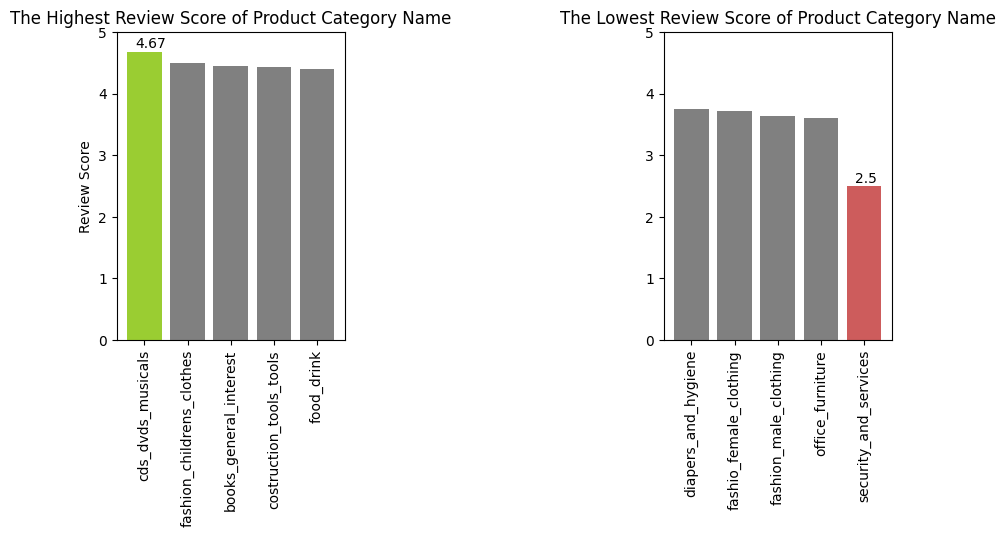

In [38]:
plt.figure(figsize=(10,4))
plt.subplot(1, 3, 1)
plt.bar(x=translated_category_score[:5].product_category_name_english, 
        height=translated_category_score[:5].avg_review_score, 
        color=['yellowgreen', 'grey', 'grey', 'grey', 'grey'],
        )

plt.ylabel('Review Score')
plt.title('The Highest Review Score of Product Category Name')
plt.text(x=-0.2, y=4.75,s=format(round(translated_category_score.iloc[0].avg_review_score, 2)))
plt.xticks(rotation=90)
plt.ylim(0, 5)

plt.subplot(1, 3, 3)
plt.bar(x=translated_category_score[-5:].product_category_name_english, 
        height=translated_category_score[-5:].avg_review_score, 
        color=['grey', 'grey', 'grey', 'grey', 'indianred'])
plt.title('The Lowest Review Score of Product Category Name')
plt.text(x=3.8, y=2.55,s=format(round(translated_category_score.iloc[-1].avg_review_score, 2)))
plt.xticks(rotation=90)
plt.ylim(0, 5)

### Pertanyaan 2:

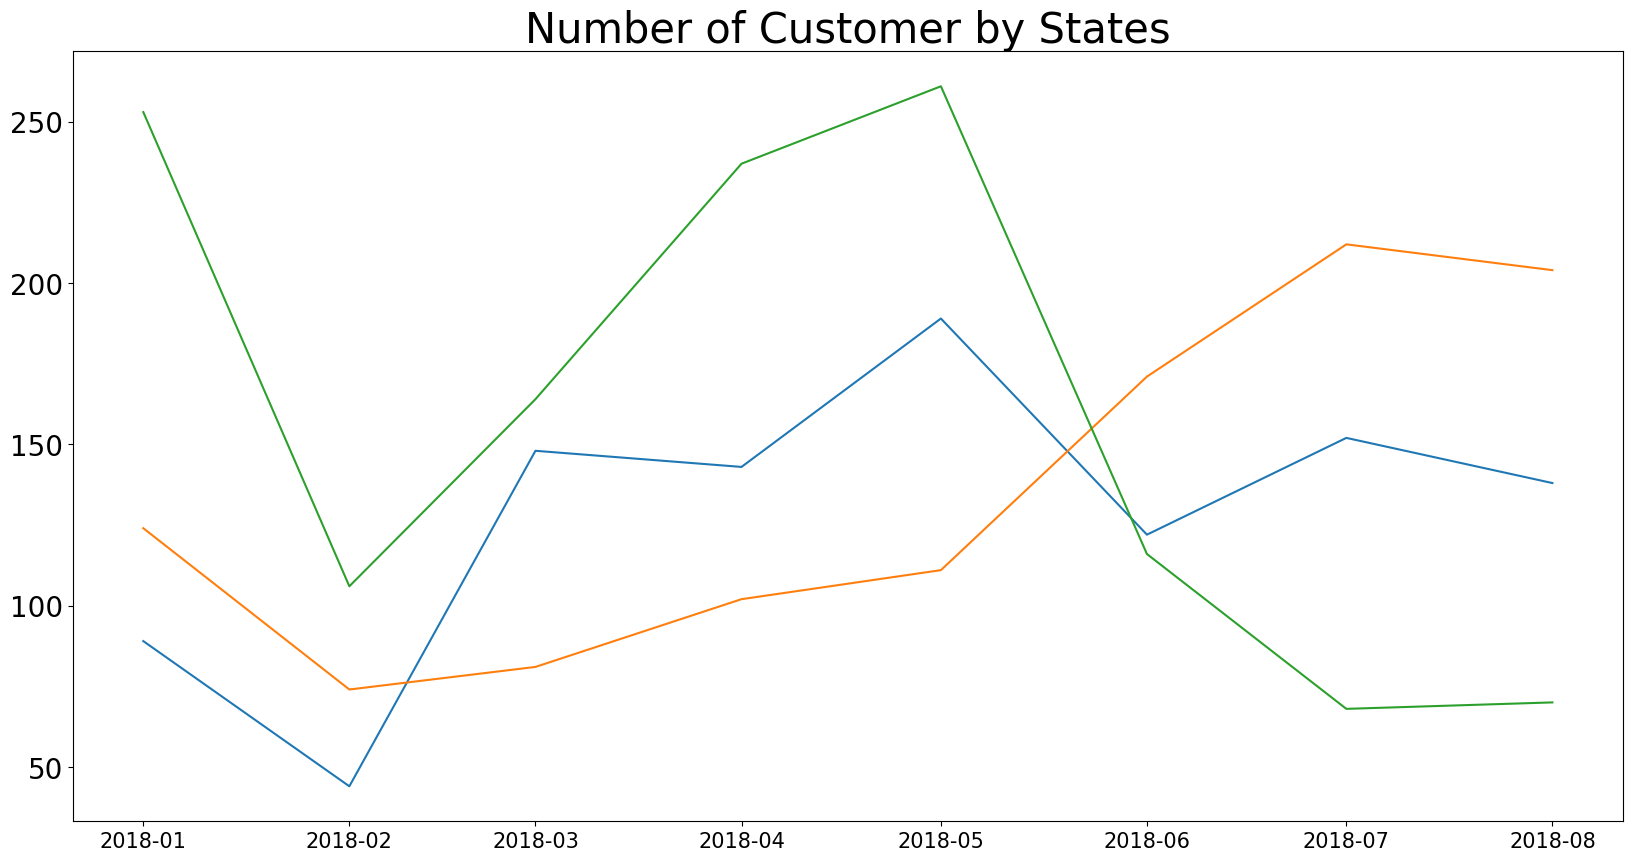

In [39]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 10))


for seller in transaction_counts['seller_id'].unique():
    seller_data = transaction_counts[transaction_counts['seller_id'] == seller]
    sns.lineplot(
        x="year_month", 
        y="transaction_count",
        data=seller_data,
        ax=ax
    )
ax.set_title("Number of Customer by States", loc="center", fontsize=30)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)

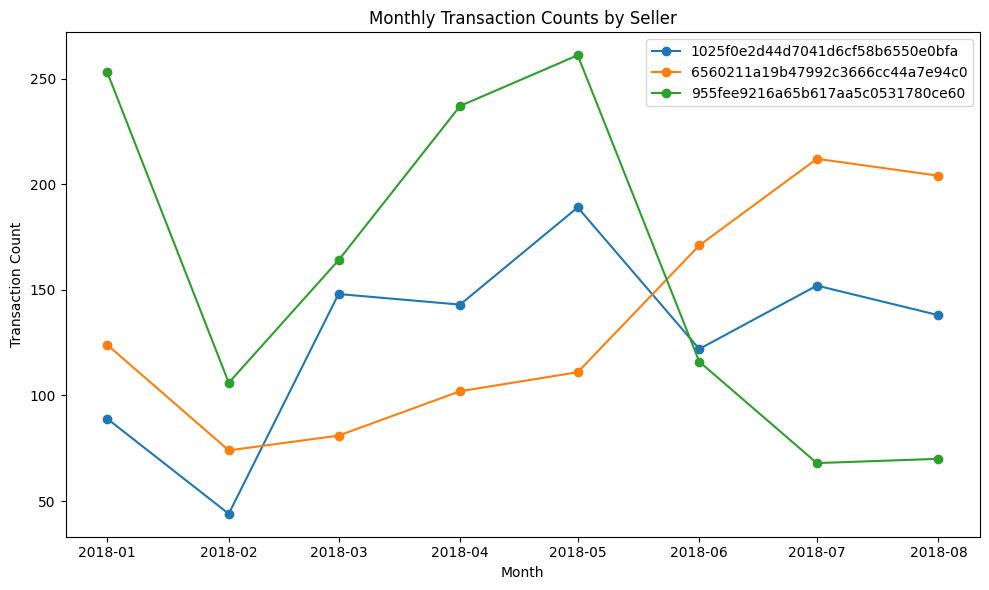

In [40]:
import matplotlib.pyplot as plt

# Plot the transaction counts over time for each seller
plt.figure(figsize=(10, 6))

for seller in transaction_counts['seller_id'].unique():
    seller_data = transaction_counts[transaction_counts['seller_id'] == seller]
    plt.plot(seller_data['year_month'], seller_data['transaction_count'], label=seller, marker='o')

plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.title('Monthly Transaction Counts by Seller')
plt.legend()
plt.tight_layout()
plt.show()

**Insight:**
- cds_dvds_musicals adalah product category name dengan rata-rata nilai review score tertinggi
- beberapa seller mengalami tren penjualan yang menurun dari bulan ke bulannya pada tahun 2018

## Analisis Lanjutan (Opsional)

Jenis Pembayaran yang banyak digunakan

In [41]:
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [42]:
new_all = pd.merge(all, order_payment, on='order_id', how='inner')

In [43]:
payment_method = new_all.groupby('payment_type').size()
payment_method

payment_type
boleto         23018
credit_card    87258
debit_card      1699
voucher         6332
dtype: int64

In [44]:
payment_method = pd.DataFrame(payment_method.to_dict().items(), columns=['product_category_name','avg_review_score'])
payment_method

,product_category_name,avg_review_score
0,boleto,23018
1,credit_card,87258
2,debit_card,1699
3,voucher,6332


## Conclusion

### Conclution pertanyaan 1
- 5 Product Category Name dengan review score rata-rata tertinggi yaitu
    - cds_dvds_musicals
    - fashion_childrens_clothes
    - books_general_interest
    - construction_tools_tolls
    - food_drink
- 5 Product Category Name dengan review score rata-rata terendah yaitu
    - diapers_and_hygiene
    - fashion_female_clothing
    - fashion_male_clothing
    - office_furniture
    - security_and_services


### Conclution pertanyaan 2
- 3 Perusahan dengan transaksi terbesar adalah
    - 955fee9216a65b617aa5c0531780ce60 (1)
    - 6560211a19b47992c3666cc44a7e94c0 (2)
    - 1025f0e2d44d7041d6cf58b6550e0bfa (3)
- seller pertama menunjukkan kecenderungan penjualan yang rendah di awal bulan, kemudian mengalami penurunan drastis di bulan berikutnya, namun mengalami penjualan yang relatif stagnan di sisa bulan yang ada
- seller kedua menunjukkan kenaikan jumlah penjualan dari awal hingga akhir periode, berbeda halnya dengan seller ketiga yang harus mengalami penurunan penjualan yang sangat drastis diakhir periode